In [2]:
# all the imports 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split



In [7]:

df = pd.read_csv("data_clean2.csv",delimiter=" ",skipinitialspace=True)

# Dropping nan data
df.dropna(subset=['Age'], inplace=True)



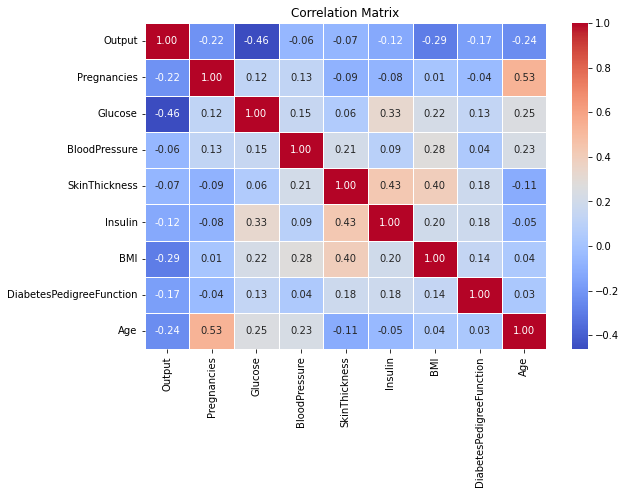

In [8]:
#correlation_matrix tab
correlation_matrix = df.corr()

# Create a heatmap for the correlation matrix using Seaborn
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

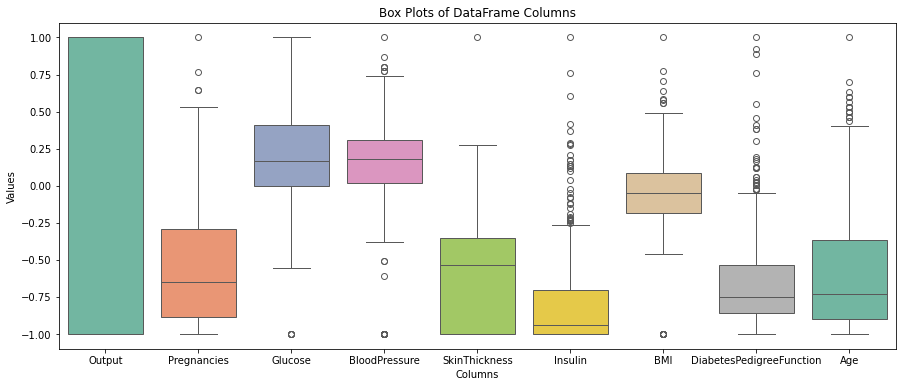

In [9]:
#box plot tab

plt.figure(figsize=(15, 6))
sns.boxplot(data=df, orient='vertical', palette='Set2')
plt.title('Box Plots of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [14]:
# perceptron helpers

def initialize_weights(num_features):
    return np.zeros(num_features + 1)  # +1 for the bias term

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(weights, x):
    # Calculate the activation using the sigmoid function
    activation = sigmoid(np.dot(weights, x))
    
    # Set a threshold (e.g., 0.5) for binary classification
    return 1 if activation >= 0.4 else -1

def train_perceptron(X_train, y_train, learning_rate=0.01, num_epochs=100):
    num_features = X_train.shape[1]
    weights = initialize_weights(num_features)
    print("the learning rate is", learning_rate)
    for j in range(num_epochs):
        for i in range(len(X_train)):
            x = np.insert(X_train[i], 0, 1)  # Add bias term
            y_pred = predict(weights, x)
            error = y_train[i] - y_pred
            weights[1:] += learning_rate * error * x[1:]
            weights[0] += learning_rate * error
    
    return weights

def train_perceptron2(X_train, y_train, learning_rate=0.01, num_epochs=100):
    num_features = X_train.shape[1]
    weights = initialize_weights(num_features)
    print("the learning rate is", learning_rate)
    
    # Initialize a vector to store the squared gradients for each weight
    squared_gradients = np.zeros(num_features + 1)
    
    epsilon = 1e-8  # Small constant to prevent division by zero
    
    for j in range(num_epochs):
        for i in range(len(X_train)):
            x = np.insert(X_train[i], 0, 1)  # Add bias term
            y_pred = predict(weights, x)
            error = y_train[i] - y_pred
            
            # Compute the gradient of the loss with respect to each weight
            gradient = -2 * error * x
            
            # Update the squared gradients with the squared gradient of the current iteration
            squared_gradients += gradient ** 2
            
            # Update the weights with the adaptive learning rate
            weights[1:] -= (learning_rate / np.sqrt(squared_gradients[1:] + epsilon)) * gradient[1:]
            weights[0] -= (learning_rate / np.sqrt(squared_gradients[0] + epsilon)) * gradient[0]
    
    return weights


In [15]:


X = df.drop('Output',axis=1)
y = df['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1454)
perceptron_weights = train_perceptron(X_train.values, y_train.values, learning_rate=0.01, num_epochs=2000)
y_pred = [predict(perceptron_weights, np.insert(x,0,1)) for x in X_test.values]

perceptron_weights2 = train_perceptron2(X_train.values, y_train.values, learning_rate=0.01, num_epochs=2000)
y_pred2 = [predict(perceptron_weights, np.insert(x,0,1)) for x in X_test.values]



the learning rate is 0.01
the learning rate is 0.01


Classification Report:
               precision    recall  f1-score   support

       False       0.53      0.68      0.59       107
        True       0.79      0.66      0.72       197

    accuracy                           0.67       304
   macro avg       0.66      0.67      0.66       304
weighted avg       0.70      0.67      0.68       304



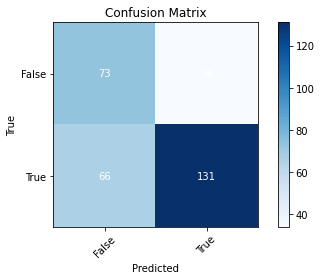

In [16]:

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ["False","True"]
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='w')
plt.tight_layout()

# Display classification report
class_report = classification_report(y_test, y_pred, target_names=class_labels)
print('Classification Report:\n', class_report)

plt.show()


Classification Report:
               precision    recall  f1-score   support

       False       0.53      0.68      0.59       107
        True       0.79      0.66      0.72       197

    accuracy                           0.67       304
   macro avg       0.66      0.67      0.66       304
weighted avg       0.70      0.67      0.68       304



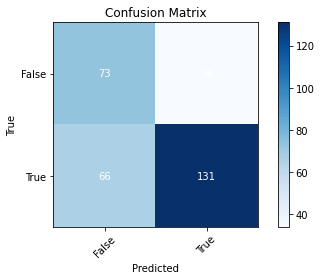

In [17]:

accuracy = accuracy_score(y_test, y_pred2)
report = classification_report(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
class_labels = ["False","True"]
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='w')
plt.tight_layout()

# Display classification report
class_report = classification_report(y_test, y_pred, target_names=class_labels)
print('Classification Report:\n', class_report)

plt.show()


In [18]:
accuracy_values = []

# Define different learning rates and numbers of epochs to experiment with
learning_rate = 0.002
num_epochs_list = [5,50,500,1000,2000,3000,5000,6000,7000,10000,12000]


for num_epochs in num_epochs_list:
       

        # Train your model here (replace this with your actual training code)
        # ...
    perceptron_weights = train_perceptron(X_train.values, y_train.values, learning_rate=learning_rate, num_epochs=num_epochs)
  
    # Calculate accuracy on the current training data
    y_pred = [predict(perceptron_weights, np.insert(x,0,1)) for x in X_test.values]
    
    accuracy = accuracy_score(y_test, y_pred)

    accuracy_values.append(accuracy)
    


the learning rate is 0.002
the learning rate is 0.002
the learning rate is 0.002
the learning rate is 0.002
the learning rate is 0.002
the learning rate is 0.002
the learning rate is 0.002
the learning rate is 0.002
the learning rate is 0.002
the learning rate is 0.002
the learning rate is 0.002


[0.625, 0.41776315789473684, 0.5197368421052632, 0.4144736842105263, 0.4407894736842105, 0.4605263157894737, 0.4375, 0.4243421052631579, 0.5131578947368421, 0.4407894736842105, 0.4243421052631579]


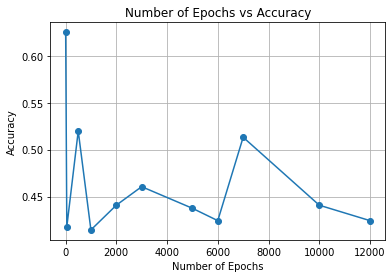

In [19]:
print(accuracy_values)
plt.plot(num_epochs_list, accuracy_values, marker='o')
plt.title('Number of Epochs vs Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [20]:
def remove_outliers(df, threshold=2):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < threshold).all(axis=1)]

# Remove rows with outliers from all columns
df2 = remove_outliers(df)

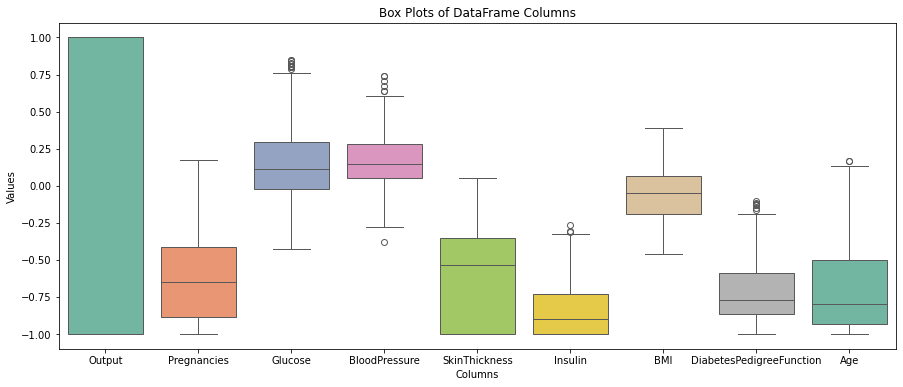

In [21]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df2, orient='vertical', palette='Set2')
plt.title('Box Plots of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [22]:
X = df2.drop('Output',axis=1) 
y = df2['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3423)
perceptron_weights = train_perceptron(X_train.values, y_train.values, learning_rate=0.001, num_epochs=20000)
y_pred = [predict(perceptron_weights, np.insert(x,0,1)) for x in X_test.values]



the learning rate is 0.001


Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.35      0.49        31
        True       0.79      0.96      0.87        78

    accuracy                           0.79       109
   macro avg       0.79      0.66      0.68       109
weighted avg       0.79      0.79      0.76       109



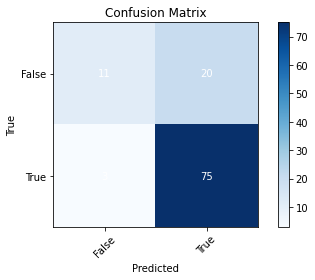

In [23]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ["False","True"]
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='w')
plt.tight_layout()

# Display classification report
class_report = classification_report(y_test, y_pred, target_names=class_labels)
print('Classification Report:\n', class_report)

plt.show()
